# Titanic Kaggle

In [ ]:
url = ['train.csv', 'test.csv']

['/kaggle/input/titanic/train.csv',
 '/kaggle/input/titanic/test.csv',
 '/kaggle/input/titanic/gender_submission.csv']

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(url[0], index_col="PassengerId")
test = pd.read_csv(url[1], index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 11)

# Избавляемся от пропусков

**Большая часть, номеров кабинок не известна, удаление семплов с nan слишком сильно ударит по кол-ву данных**

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
drop_cols = ["Cabin", "Name", "Ticket"] # name тк неинформативная фича

data.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


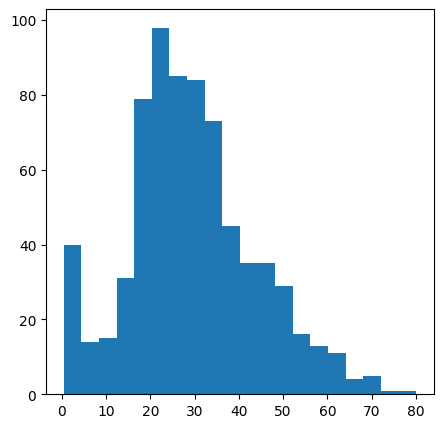

In [ ]:
plt.figure(figsize=(5, 5))

plt.hist(data["Age"], bins=20)
plt.show();

In [ ]:
data.loc[data["Age"].isna(), "Age"] = data["Age"].mean()
test.loc[test["Age"].isna(), "Age"] = (test["Age"].mean() + data["Age"].mean()) / 2

data.dropna(inplace=True)
data.shape

(889, 8)

In [ ]:
test.loc[test.Fare.isna(), "Fare"] = (test["Fare"].mean() + data["Fare"].mean()) / 2

# Анализ датасета

In [ ]:
cat_cols = data.select_dtypes("object")
num_cols = data.select_dtypes("number")

num_cols

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.000000,1,0,7.2500
2,1,1,38.000000,1,0,71.2833
3,1,3,26.000000,0,0,7.9250
4,1,1,35.000000,1,0,53.1000
5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000
888,1,1,19.000000,0,0,30.0000
889,0,3,29.699118,1,2,23.4500


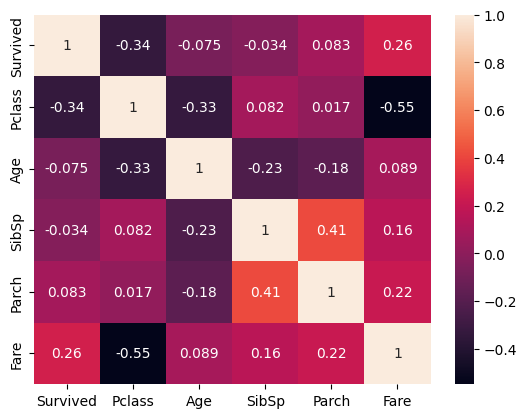

In [ ]:
import seaborn as sns

corr = num_cols.corr()
sns.heatmap(corr, annot=True);

Заметна логичная сильная корреляция между классом билета и его стоимостью, а также между количеством родителей/детей и братьями/сестрами, тк путешествуют вместе семьей. Важнее является корреляция между классом билета и выживанием, аналогично с стоимостью

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

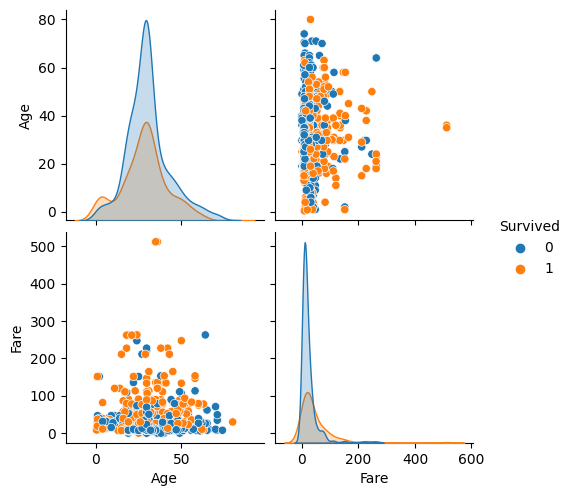

In [ ]:
sns.pairplot(num_cols.drop(["SibSp", "Parch", "Pclass"], axis=1), hue="Survived");

Заметны некоторые выбросы по стоимости билетов, и разнообразное распределение стоимости билета по возрастам

# Feature engineering

Добавим новую фичу заменив siblings and parents

In [ ]:
data["Family_members"] = data["SibSp"] + data["Parch"]
data.drop(["SibSp","Parch"], axis=1, inplace=True)

test["Family_members"] = test["SibSp"] + test["Parch"]
test.drop(["SibSp","Parch"], axis=1, inplace=True)

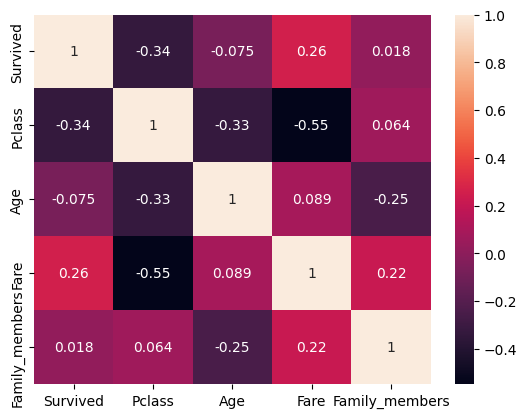

In [ ]:
corr = data.select_dtypes("number").corr()
sns.heatmap(corr, annot=True);

Onehotencoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = data.select_dtypes("object")
encoder = OneHotEncoder(drop="if_binary")
encode_data = encoder.fit_transform(cat_cols).toarray()
encode_df = pd.DataFrame(encode_data, columns=encoder.get_feature_names_out(), index=data.index)
data = pd.concat((data.drop(cat_cols.columns, axis=1), encode_df), axis=1)

cat_cols = test.select_dtypes("object")
test_encode_data = encoder.fit_transform(test[cat_cols.columns]).toarray()
test_encode_df = pd.DataFrame(test_encode_data, columns=encoder.get_feature_names_out(), index=test.index)
test = pd.concat((test.drop(cat_cols.columns, axis=1), test_encode_df), axis=1)

data

,Survived,Pclass,Age,Fare,Family_members,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.000000,7.2500,1,1.0,0.0,0.0,1.0
2,1,1,38.000000,71.2833,1,0.0,1.0,0.0,0.0
3,1,3,26.000000,7.9250,0,0.0,0.0,0.0,1.0
4,1,1,35.000000,53.1000,1,0.0,0.0,0.0,1.0
5,0,3,35.000000,8.0500,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,13.0000,0,1.0,0.0,0.0,1.0
888,1,1,19.000000,30.0000,0,0.0,0.0,0.0,1.0
889,0,3,29.699118,23.4500,3,0.0,0.0,0.0,1.0


# Препроцессинг числовых данных

Избавимся от выбросов в Fare и Age c помощью межквартильного размаха

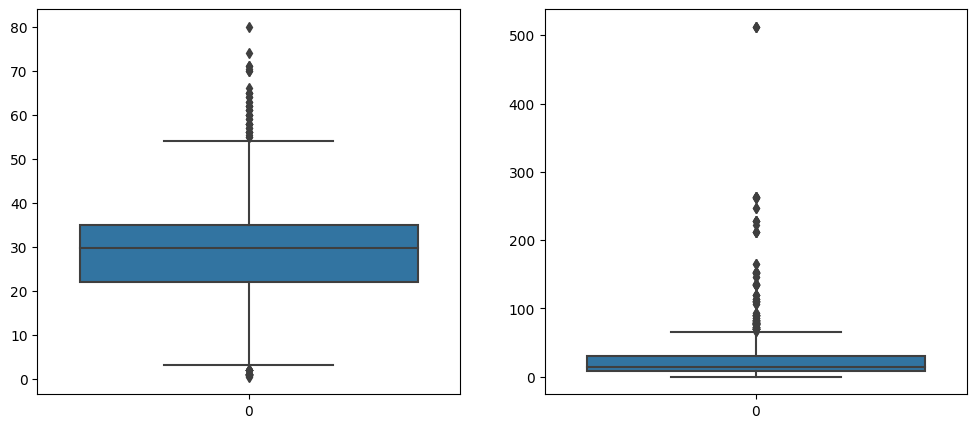

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(data=data["Age"].values)

plt.subplot(122)
sns.boxplot(data=data["Fare"].values);

In [ ]:
data.shape

(889, 9)

In [ ]:
for feature in ["Age", "Fare"]:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    irq = q3 - q1
    low_level = q1 - 1.5 * irq
    high_level = q3 + 1.5 * irq

    data = data[(data[feature] >= low_level) & (data[feature] <= high_level)]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data.Fare.to_numpy()[:, np.newaxis])
data.Fare = scaler.transform(data.Fare.to_numpy()[:, np.newaxis])

test.Fare = scaler.fit_transform(test.Fare.to_numpy()[:, np.newaxis])

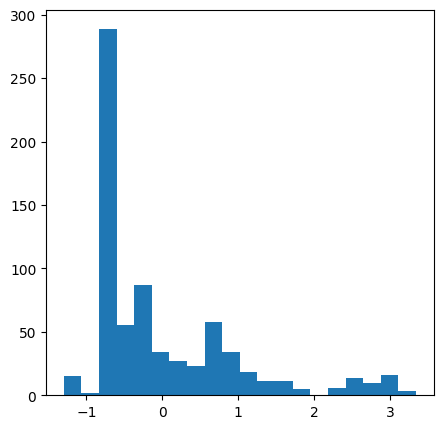

In [ ]:
plt.figure(figsize=(5, 5))

plt.hist(data["Fare"], bins=20)
plt.show();

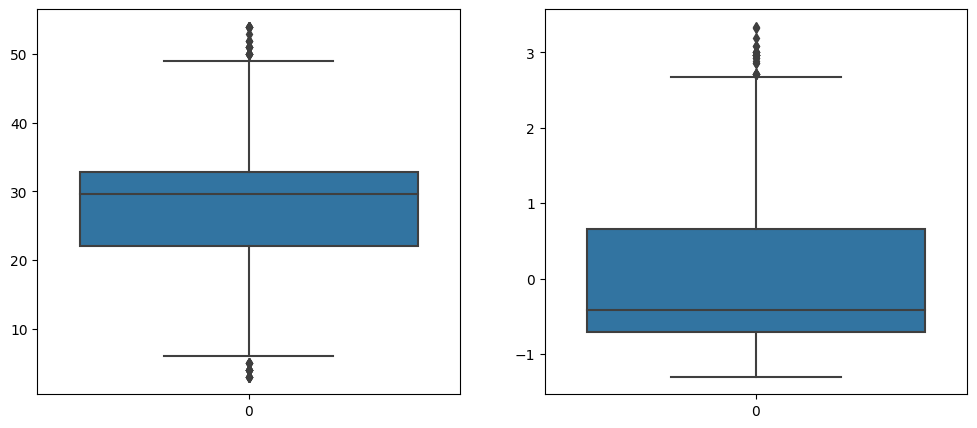

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(data=data["Age"].values)

plt.subplot(122)
sns.boxplot(data=data["Fare"].values);

# Выбор и обучение модели

Для предсказания будет использовать градиентный бустинг

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop(("Survived"), axis=1), data["Survived"], test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

eval_data = [(dtrain, "train"), (dtest, "test")]

Callback функция

In [ ]:
from IPython.display import clear_output
from xgboost.callback import TrainingCallback


class PlotCallback(TrainingCallback):
    def __init__(self):
        super().__init__()

    def after_iteration(self, model, epoch, evals_log):
        train_loss = evals_log["train"]["logloss"]
        test_loss = evals_log["test"]["logloss"]

        train_acc = 1 - np.array(evals_log["train"]["error"])
        test_acc = 1 - np.array(evals_log["test"]["error"])

        train_rocauc = evals_log["train"]["auc"]
        test_rocauc = evals_log["test"]["auc"]


        if (epoch + 1) % 200 == 0:
            print("best accuracy train", round(max(train_acc), 3), "best accuracy test", round(max(test_acc), 3), "best train auc: ", round(max(train_rocauc), 3), "best test auc: ", round(max(test_rocauc), 3))

            plt.figure(figsize=(18, 5))
            plt.subplot(131)
            plt.plot(train_loss, color="blue", label="train")
            plt.plot(test_loss, color="orange", label="test")
            plt.title(f"Loss, epoch: {epoch + 1}")
            plt.legend()

            plt.subplot(132)
            plt.plot(train_acc, color="blue", label="train")
            plt.plot(test_acc, color="orange", label="test")
            plt.title(f"Accuracy, epoch: {epoch + 1}")
            plt.legend()

            plt.subplot(133)
            plt.plot(train_rocauc, color="blue", label="train")
            plt.plot(test_rocauc, color="orange", label="test")
            plt.title(f"ROC-AUC, epoch: {epoch + 1}")
            plt.legend()

            plt.show()

        return False

**Для сохранения модели с лучшим roc auc**

In [ ]:
class SaveModel(TrainingCallback):
    def __init__(self):
        super().__init__()
        self.max_auc = 0
        self.best_model = None

    def after_iteration(self, model, epoch, evals_log):
        test_auc = evals_log["test"]["auc"]

        if test_auc[-1] > self.max_auc:
            self.max_auc = test_auc[-1]
            self.best_model = model


        return False

**Пройдемся по сетке вручную**

Model with max_depth: 3, lr: 0.01
best accuracy train 0.826 best accuracy test 0.792 best train auc:  0.877 best test auc:  0.872


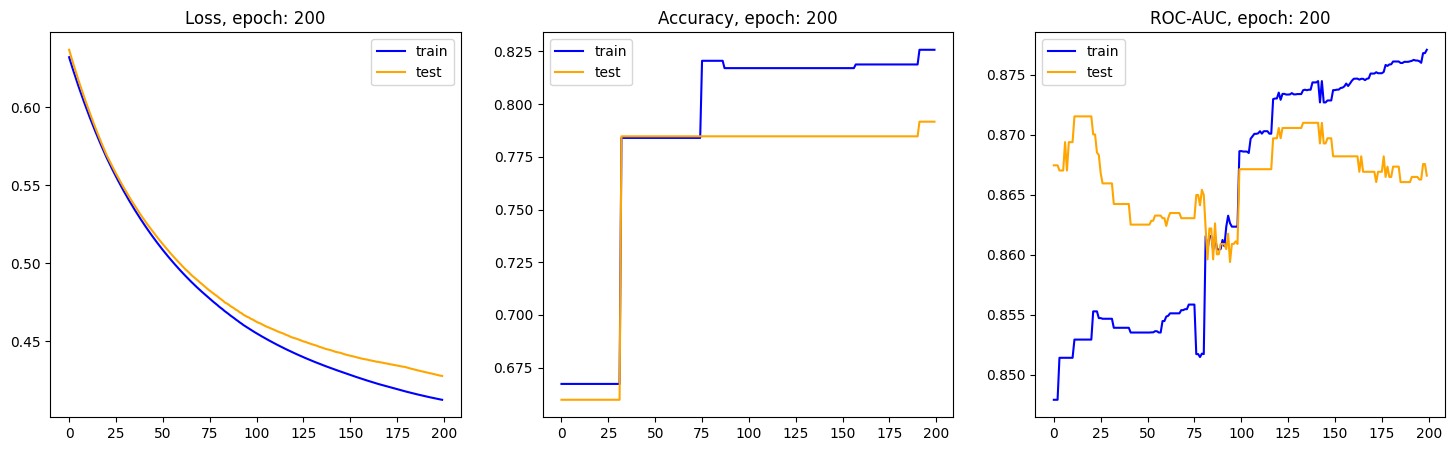

Model with max_depth: 3, lr: 0.005
best accuracy train 0.821 best accuracy test 0.785 best train auc:  0.869 best test auc:  0.872


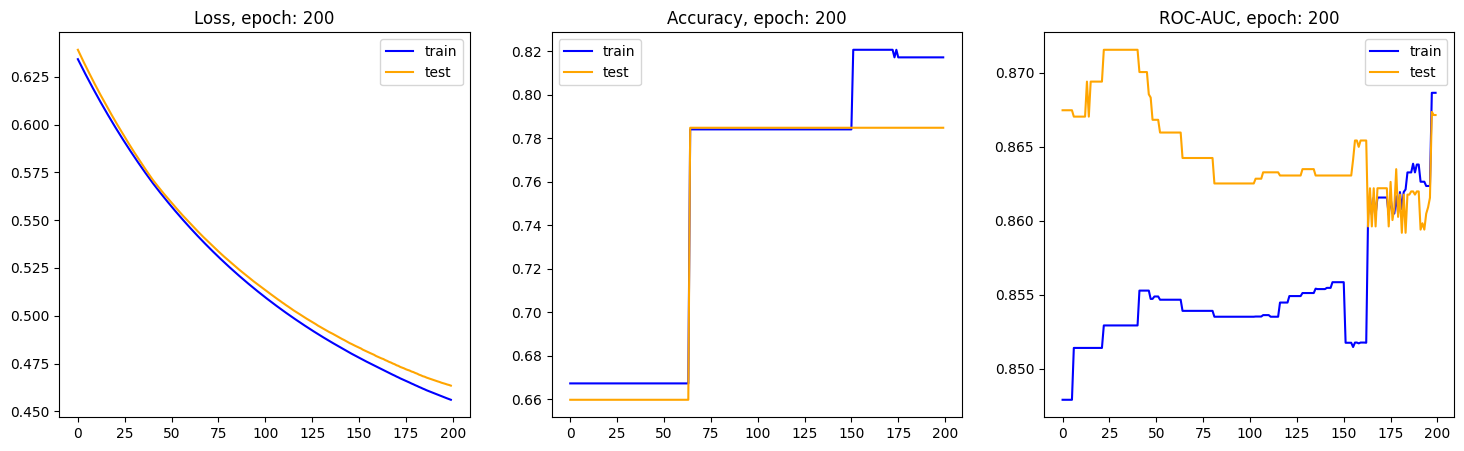

Model with max_depth: 3, lr: 0.001
best accuracy train 0.667 best accuracy test 0.66 best train auc:  0.853 best test auc:  0.872


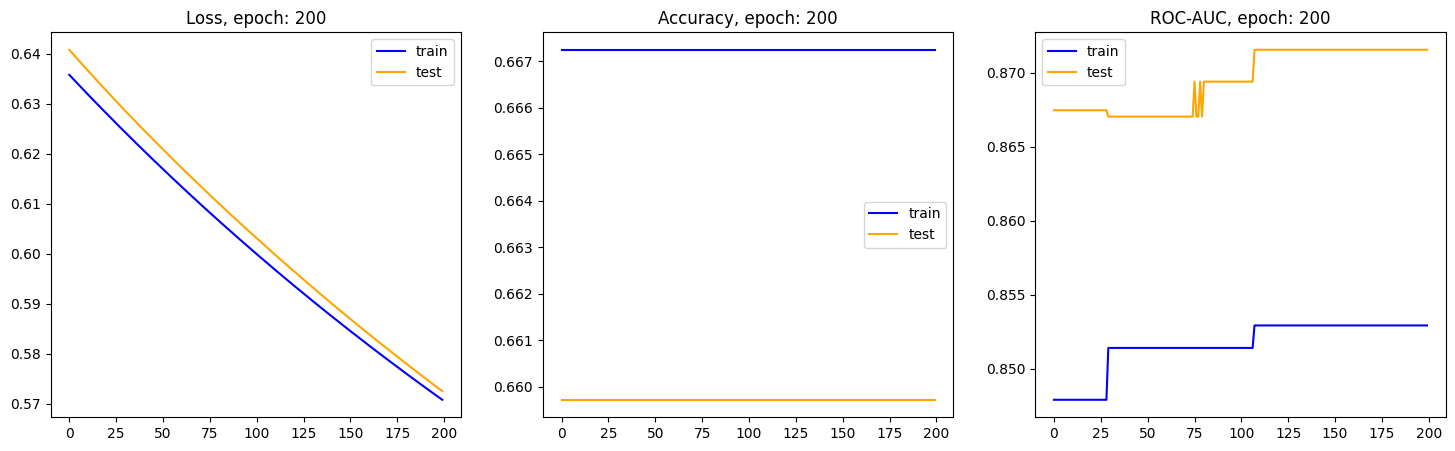

Model with max_depth: 4, lr: 0.01
best accuracy train 0.871 best accuracy test 0.833 best train auc:  0.902 best test auc:  0.88


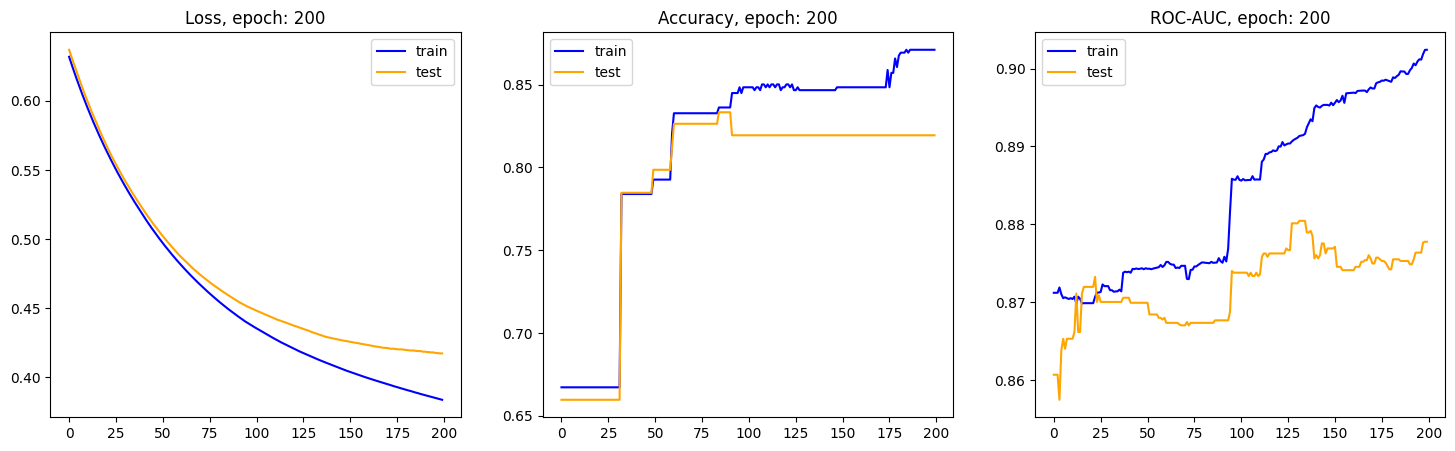

Model with max_depth: 4, lr: 0.005
best accuracy train 0.848 best accuracy test 0.833 best train auc:  0.886 best test auc:  0.874


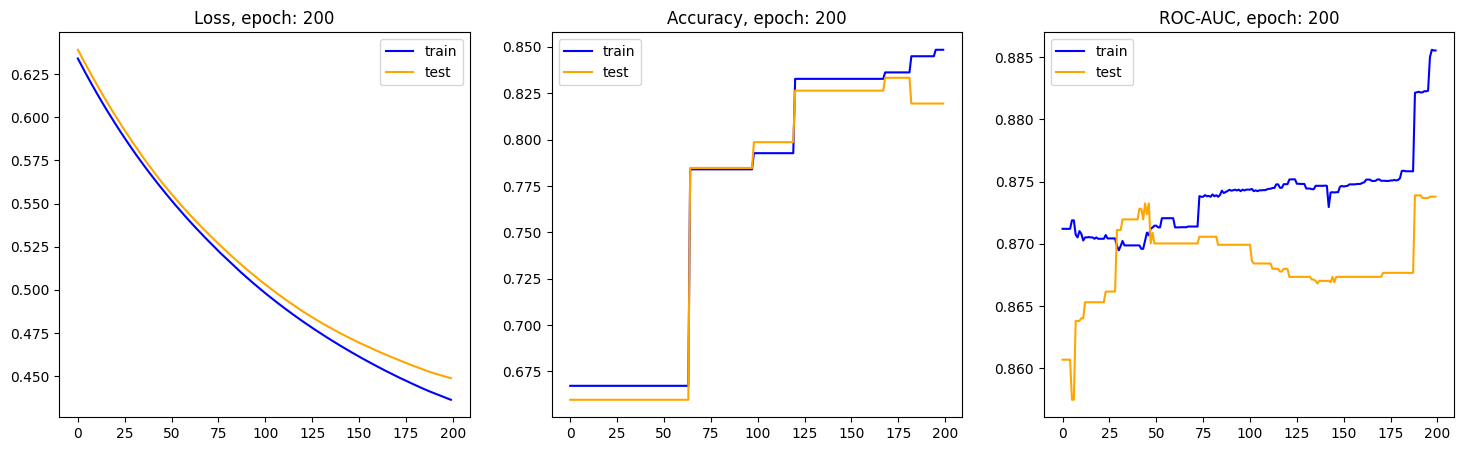

Model with max_depth: 4, lr: 0.001
best accuracy train 0.667 best accuracy test 0.66 best train auc:  0.876 best test auc:  0.873


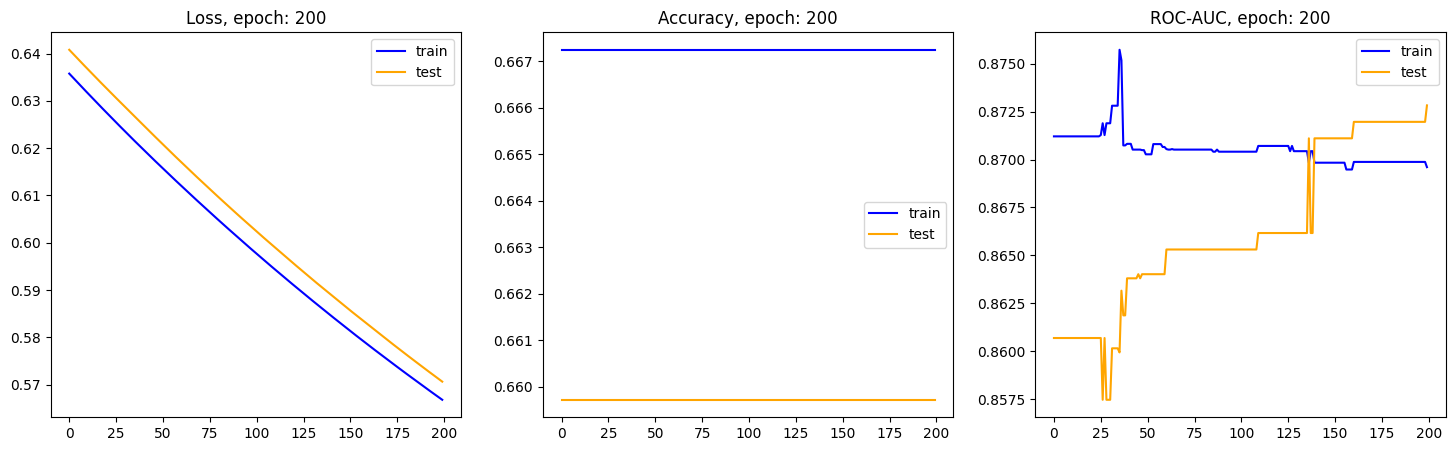

Model with max_depth: 5, lr: 0.01
best accuracy train 0.878 best accuracy test 0.819 best train auc:  0.927 best test auc:  0.895


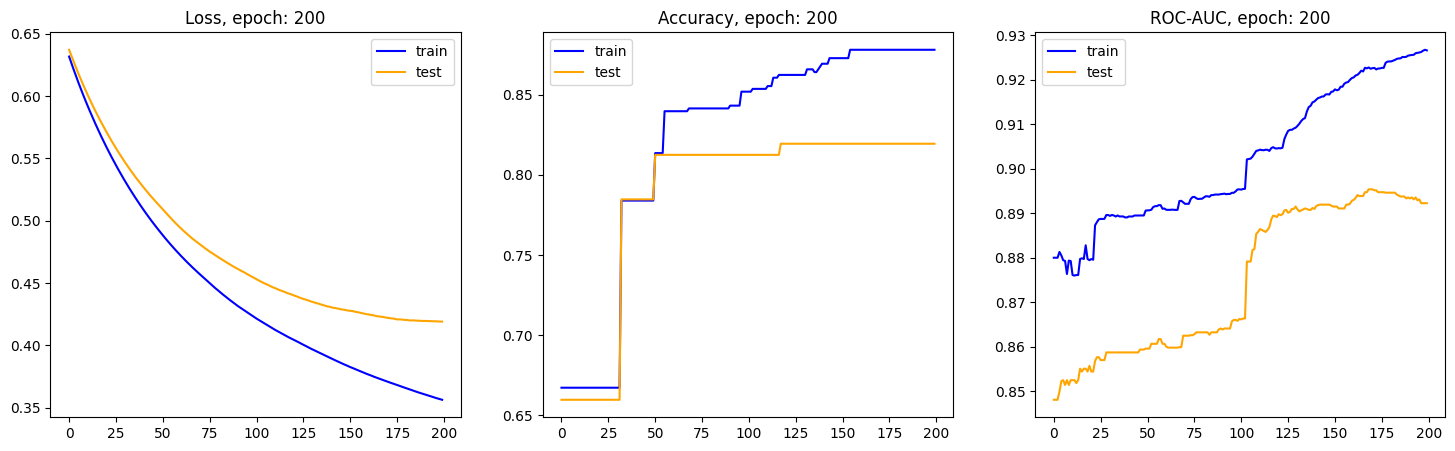

Model with max_depth: 5, lr: 0.005
best accuracy train 0.852 best accuracy test 0.812 best train auc:  0.895 best test auc:  0.867


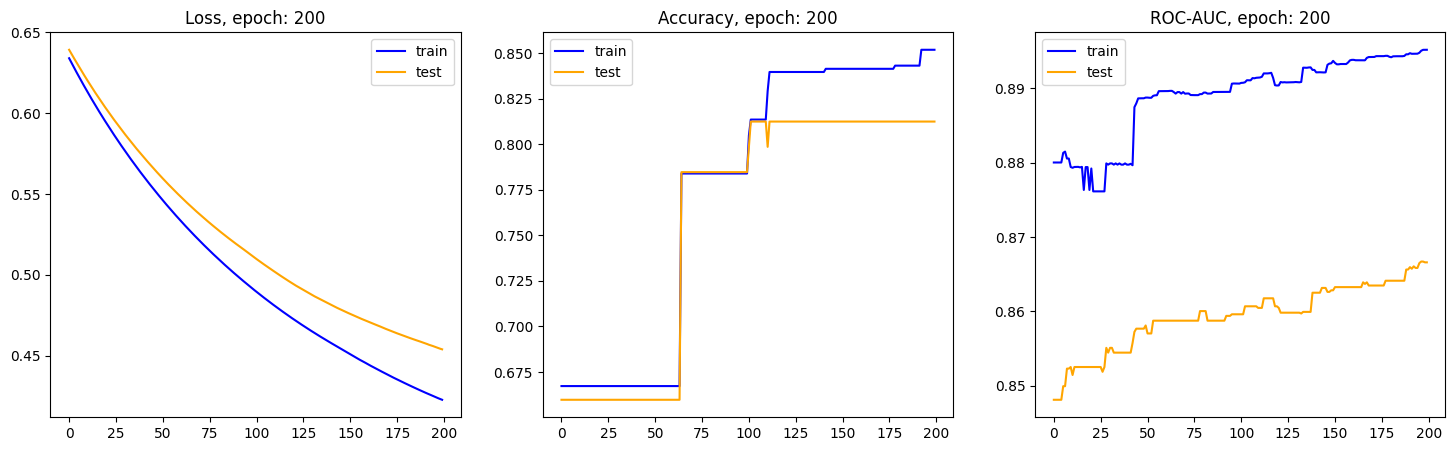

Model with max_depth: 5, lr: 0.001
best accuracy train 0.667 best accuracy test 0.66 best train auc:  0.881 best test auc:  0.855


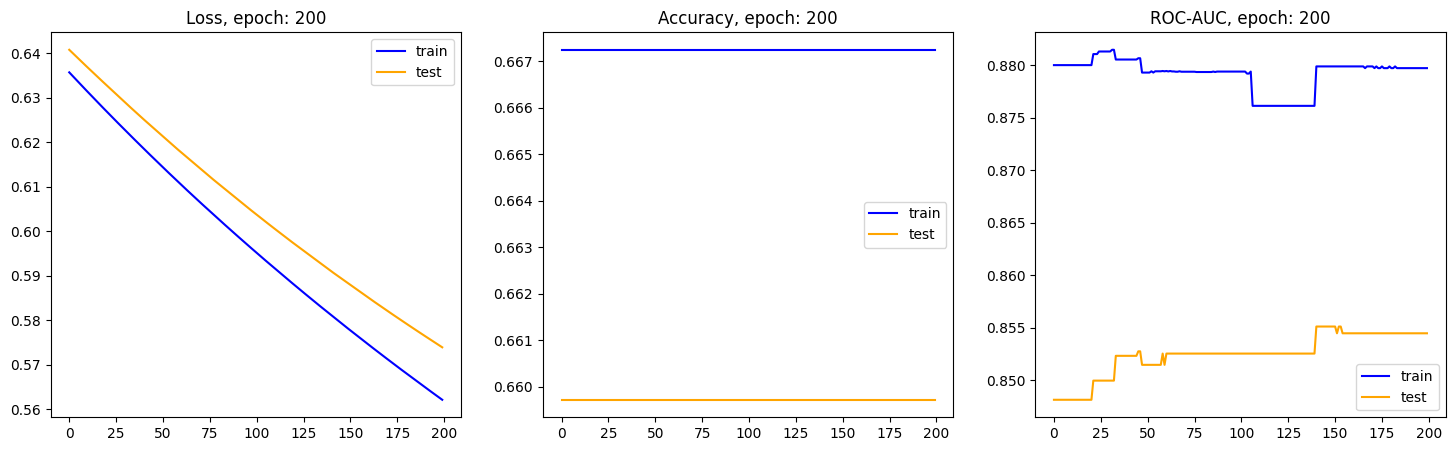

Model with max_depth: 7, lr: 0.01
best accuracy train 0.885 best accuracy test 0.826 best train auc:  0.947 best test auc:  0.891


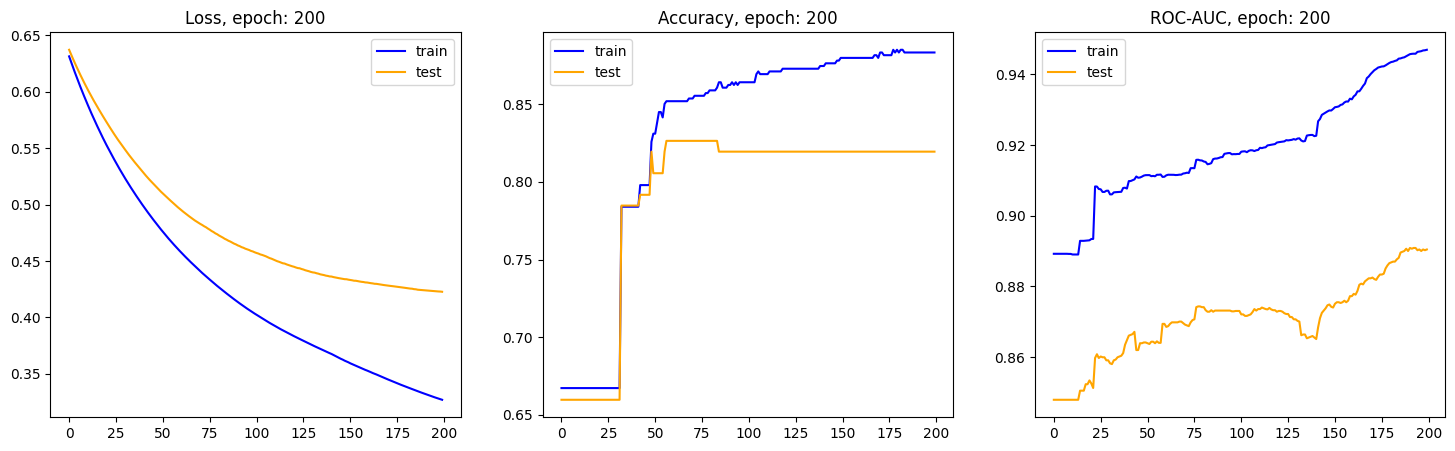

Model with max_depth: 7, lr: 0.005
best accuracy train 0.864 best accuracy test 0.826 best train auc:  0.918 best test auc:  0.874


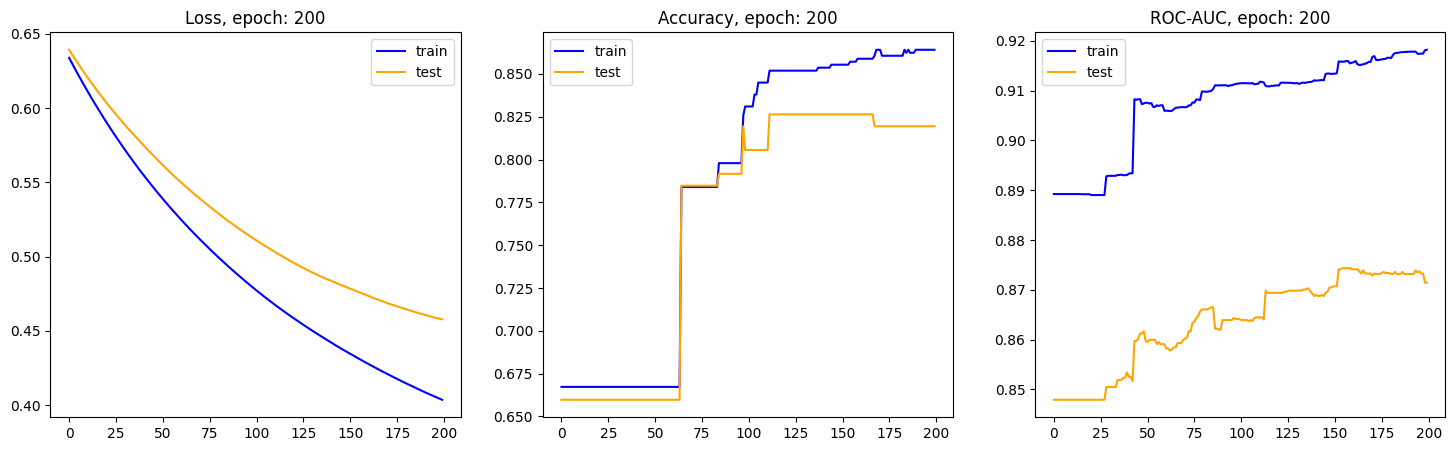

Model with max_depth: 7, lr: 0.001
best accuracy train 0.667 best accuracy test 0.66 best train auc:  0.893 best test auc:  0.853


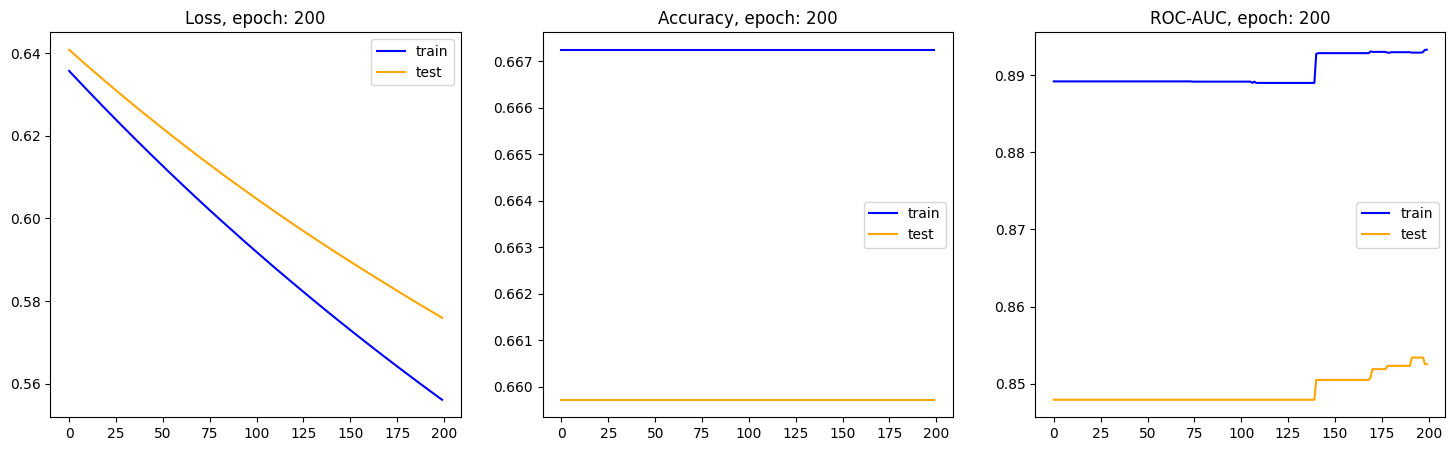

Model with max_depth: 9, lr: 0.01
best accuracy train 0.897 best accuracy test 0.833 best train auc:  0.956 best test auc:  0.881


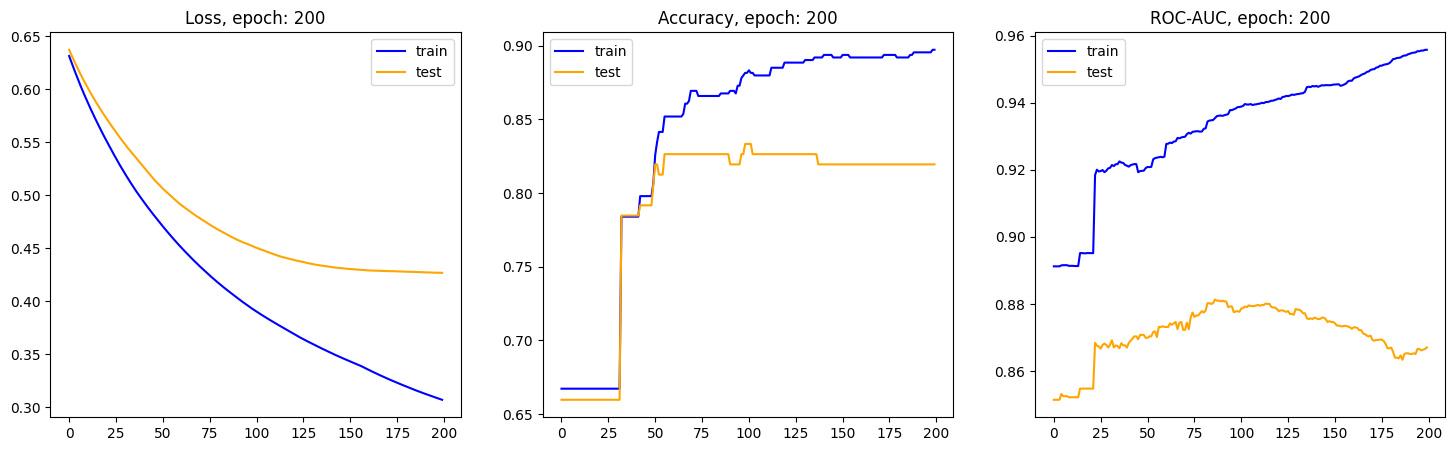

Model with max_depth: 9, lr: 0.005
best accuracy train 0.882 best accuracy test 0.833 best train auc:  0.939 best test auc:  0.881


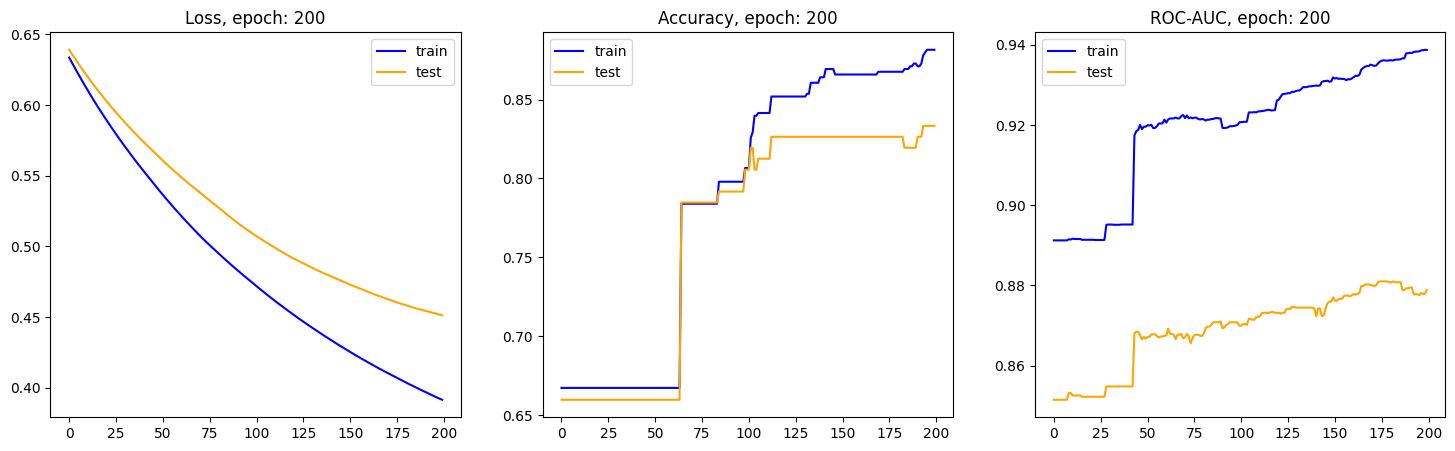

Model with max_depth: 9, lr: 0.001
best accuracy train 0.667 best accuracy test 0.66 best train auc:  0.895 best test auc:  0.855


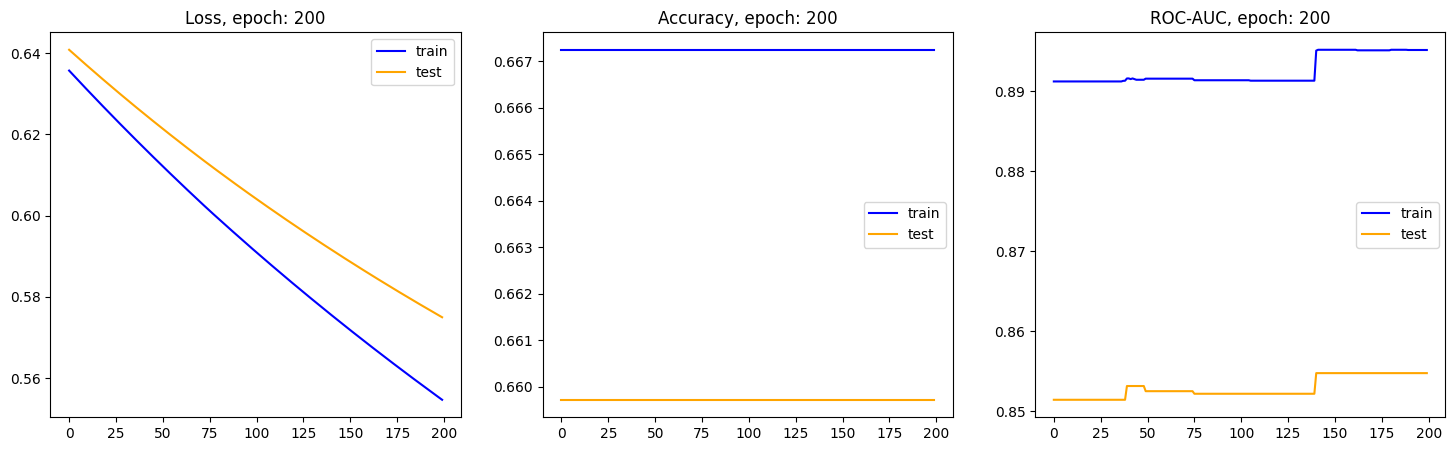

In [ ]:
from sklearn.model_selection import GridSearchCV


grid = {
    'max_depth': [3, 4, 5, 7, 9],
    'eta': [0.01, 0.005, 0.001]
}


eval_results = {}

callback = PlotCallback()
save_callback = SaveModel()
early_callback = xgb.callback.EarlyStopping(
    rounds=20,
    save_best=True,
    metric_name="auc"
)

best_auc = 0

params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'auc', "error"],
}

for i in grid["max_depth"]:
    for j in grid["eta"]:
        params["max_depth"] = i
        params["eta"] = j

        print(f"Model with max_depth: {i}, lr: {j}")
        grad_boosting = xgb.train(
            params,
            dtrain,
            num_boost_round=200,
            evals=eval_data,
            evals_result=eval_results,
            callbacks=[callback, save_callback],
            verbose_eval=False
        )
        grad_boosting = save_callback.best_model
        curr_auc = save_callback.max_auc

        if best_auc < curr_auc:
            best_auc = curr_auc
            best_model = grad_boosting
            best_models_params = {"depth": i, "lr": j}

In [ ]:
best_auc, best_models_params

(0.8966702470461869, {'depth': 5, 'lr': 0.01})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


threshould = 0.5
y_proba_train = best_model.predict(dtrain)
y_pred_train = np.where(y_proba_train > threshould, 1, 0)
y_proba_test = best_model.predict(dtest)
y_pred_test = np.where(y_proba_test > threshould, 1, 0)

accur_train = accuracy_score(y_train, y_pred_train)
accur_test = accuracy_score(y_test, y_pred_test)
accur_train, accur_test

(0.8832752613240418, 0.8055555555555556)

In [ ]:
dtest = xgb.DMatrix(test)
y_proba_test = best_model.predict(dtest)
y_pred_test = np.where(y_proba_test > threshould, 1, 0)

submission = pd.DataFrame({'PassengerId': test.index, 'Survived': y_pred_test})
submission.to_csv('submission.csv', index=False)